**Project Exam 1, Question 3**

Solved by: Omer Khan

#### Import Libraries

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense

import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Read data file and return basic file and data information

In [2]:
# create a dataframe object for the dataset
dataset = pd.read_csv("weather.csv")

It's generally a good idea to gather some information about the data so we know what we're dealing with.

In [3]:
# print general information about the file
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


In [4]:
# even more information and stats about the data
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


As seen from the result of the code snippet above, there are a total of 12 columns and 96,453 rows in the file.

Below, we print the file columns and first few rows of data.

In [5]:
# print all data set column titles
print(dataset.columns.values)

['Formatted Date' 'Summary' 'Precip Type' 'Temperature (C)'
 'Apparent Temperature (C)' 'Humidity' 'Wind Speed (km/h)'
 'Wind Bearing (degrees)' 'Visibility (km)' 'Loud Cover'
 'Pressure (millibars)' 'Daily Summary']


In [6]:
# print the first 10 rows of the data
dataset.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


#### We need to confirm whether the file contains any null values. 

In [7]:
# print the count of all null (or non-numeric) values that each column has
nulls = pd.DataFrame(dataset.isnull().sum())
nulls.columns = ['Null']
nulls.index.name = 'Feature'
print(nulls)

                          Null
Feature                       
Formatted Date               0
Summary                      0
Precip Type                517
Temperature (C)              0
Apparent Temperature (C)     0
Humidity                     0
Wind Speed (km/h)            0
Wind Bearing (degrees)       0
Visibility (km)              0
Loud Cover                   0
Pressure (millibars)         0
Daily Summary                0


In [8]:
# print the rows where any of the column data is null
dataset[dataset.isnull().any(axis=1)]

Feature,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.
...,...,...,...,...,...,...,...,...,...,...,...,...
95584,2016-10-31 19:00:00.000 +0100,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.000,0.0,1021.73,Mostly cloudy starting in the afternoon.
95585,2016-10-31 20:00:00.000 +0100,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.000,0.0,1021.76,Mostly cloudy starting in the afternoon.
95586,2016-10-31 21:00:00.000 +0100,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.000,0.0,1021.81,Mostly cloudy starting in the afternoon.
95587,2016-10-31 22:00:00.000 +0100,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.000,0.0,1021.83,Mostly cloudy starting in the afternoon.


#### Format data file in order to use correctly with the machine learning model

##### Let's take care of the nulls or missing values

As we saw above, the file does not entirely contain data. There is 517 missing or null values within the file that we need to take care of. We can either drop the rows, or fill these data points manually. 

For the purpose of this model, we will remove these rows as the missing value is non-numeric and there is no way to fill datapoints accordingly. 

In [9]:
# this will be the formatted dataset object that we will use from now on
newdataset = dataset.dropna()

###### Confirm if the null or invalid rows have been successfully dropped. Once again, print off the same data information as before

In [10]:
# print the count of all null (or non-numeric) values that each column has
nulls = pd.DataFrame(newdataset.isnull().sum())
nulls.columns = ['Null']
nulls.index.name = 'Feature'
print(nulls)

                          Null
Feature                       
Formatted Date               0
Summary                      0
Precip Type                  0
Temperature (C)              0
Apparent Temperature (C)     0
Humidity                     0
Wind Speed (km/h)            0
Wind Bearing (degrees)       0
Visibility (km)              0
Loud Cover                   0
Pressure (millibars)         0
Daily Summary                0


In [11]:
# print the rows where any of the column data is null
newdataset[newdataset.isnull().any(axis=1)]

Feature,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


##### Handling non-numeric columns


"Formatted Date", "Summary", and "Daily Summary" are all columns that contain non-numeric data entries. These columns don't need to be converted to numeric data as they barely add data that will be beneficial to the prediction model. 

As such, let's delete these columns. 

In [12]:
del newdataset['Formatted Date']
del newdataset['Summary']
del newdataset['Daily Summary']

Check quickly for new changes applied to dataframe

In [13]:
# prints only column titles
newdataset.head(0)

Feature,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)


"Precip Type" is another column that's non-numeric but we need to keep as the temperature can be dependent on it. So let's convert that to numeric values. 

In [17]:
LabEnc = preprocessing.LabelEncoder()
newdataset['Precip Type'] = LabEnc.fit_transform(newdataset['Precip Type'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Check correlation of the 'Temperature' with each of the other columns. 

In [18]:
numeric_features = newdataset.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['Temperature (C)'].sort_values(ascending=False),'\n')

Feature
Temperature (C)             1.000000
Apparent Temperature (C)    0.992637
Visibility (km)             0.393719
Wind Bearing (degrees)      0.029937
Wind Speed (km/h)           0.008304
Pressure (millibars)       -0.005253
Precip Type                -0.563503
Humidity                   -0.632148
Loud Cover                       NaN
Name: Temperature (C), dtype: float64 



##### Creating a heatmap of the correlations using Seaborn library

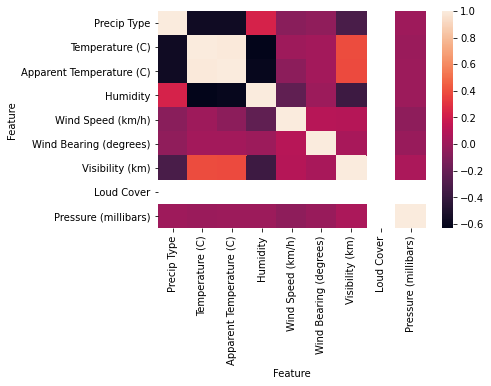

In [19]:
sns.heatmap(corr)

#### Creating a bunch of different visualization plots

##### Skew plots

Visualize the skewness of each column.

Precip Type skew is:  2.466134575172829


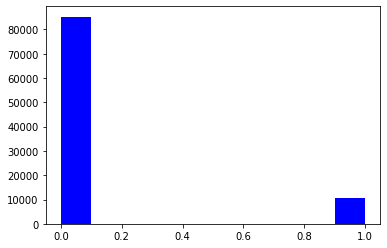



Temperature (C) skew is:  0.09179694354157195


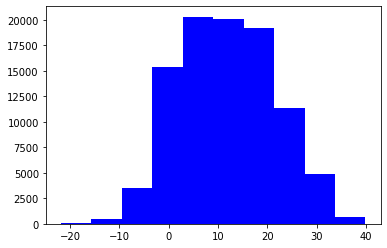



Apparent Temperature (C) skew is:  -0.05903952688910767


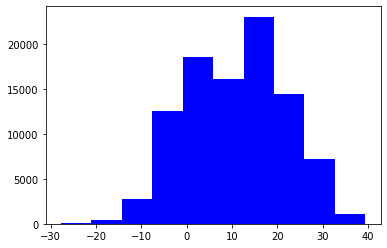



Humidity skew is:  -0.7150256591968218


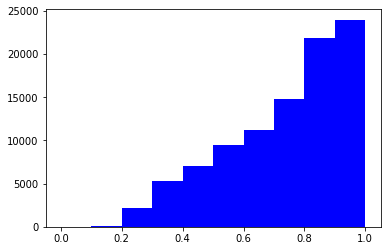



Wind Speed (km/h) skew is:  1.115994719744344


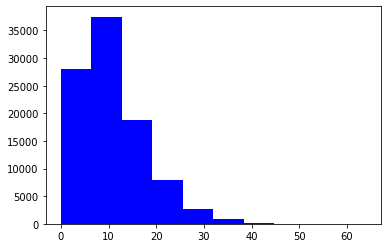



Wind Bearing (degrees) skew is:  -0.15479254225815275


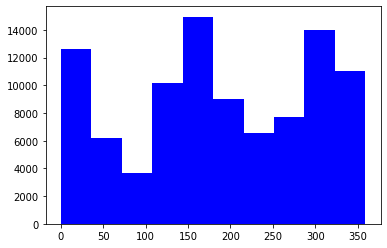



Visibility (km) skew is:  -0.49211431669314815


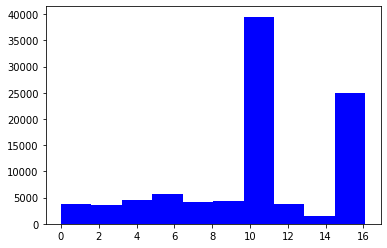



Loud Cover skew is:  0


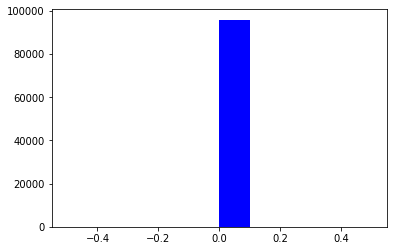



Pressure (millibars) skew is:  -8.399381374488456


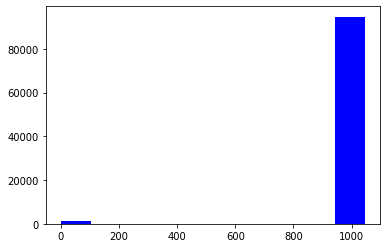

In [20]:
for col in list(newdataset.columns):
  print(col, "skew is: ", newdataset[col].skew())
  plt.hist(newdataset[col], color='blue')
  plt.show()
  print('\n')

##### Scatter plots

Temperature vs other independent columns

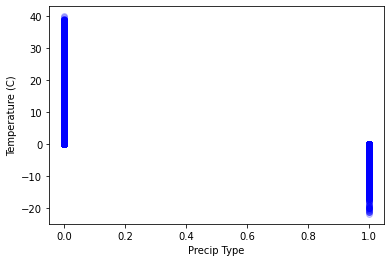

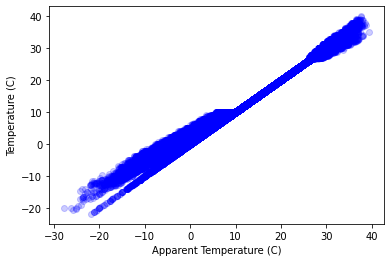

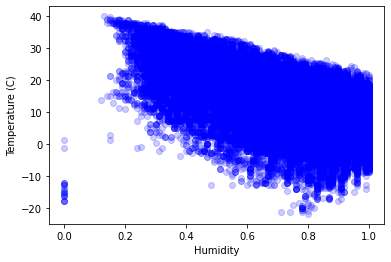

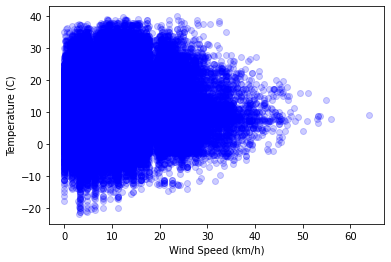

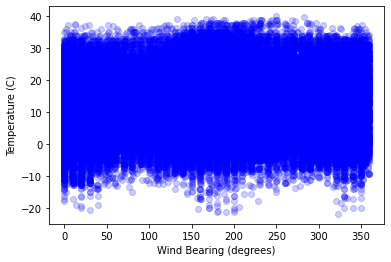

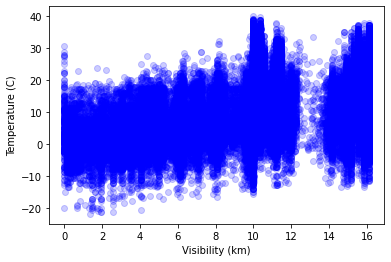

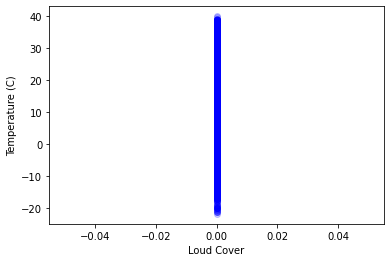

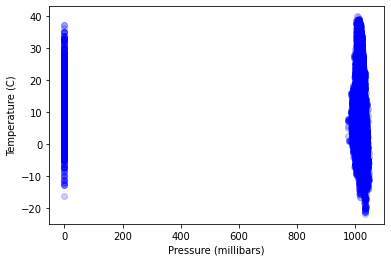

In [26]:
itercols = iter(list(newdataset.columns))
#next(itercols)
for col in itercols:
  if col == 'Temperature (C)':
    continue
  plt.scatter(newdataset[col] , newdataset['Temperature (C)'], color='blue', alpha=0.2)
  plt.xlabel(col)
  plt.ylabel('Temperature (C)')
  plt.show()
  print('\n')

#### Modeling

Creating the data split

In [27]:
X = newdataset.drop(['Temperature (C)'],axis=1)
Y = newdataset['Temperature (C)']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(len(X_train))

76748


Creating the linear regression model

In [29]:
regr = linear_model.LinearRegression()
mymodel = regr.fit(X_train, Y_train)
# The coefficients
coef_v = mymodel.coef_
print ('Coefficients: ', mymodel.coef_)
print ("\nR^2 is:", round(mymodel.score(X_test, Y_test), 2))

Coefficients:  [ 7.31831404e-02  8.73899379e-01 -1.39234783e+00  8.09919819e-02
 -4.18995015e-04  9.10497494e-03  0.00000000e+00 -1.91886498e-04]

R^2 is: 0.99


> R-squared is measuring how close the data is to the fitted regression line. 0 to 1, where 1 means that all variance is explained by data. So higher r-sqaured is good.



#### Prediction and Evaluation

Calculate the residual sum of squares, variance and RMSE. 

In [30]:
Y_pred = mymodel.predict(X_test)

print("Residual sum of squares (MSE): %.2f" % np.mean((Y_pred - Y_test) ** 2))

print('Variance score: %.2f' % mymodel.score(X_test, Y_test))

print ('RMSE is: ', mean_squared_error(Y_test, Y_pred))

Residual sum of squares (MSE): 0.90
Variance score: 0.99
RMSE is:  0.8965522559416744




> Residual sum of squares is the measure of discrepency in the data.

> Variance is the prediction measure. 1 is perfect prediction.

> RMSE measures the distance between predicted and actual values.



Creating a scatter plot to visualize actual value compared to predicted value. 

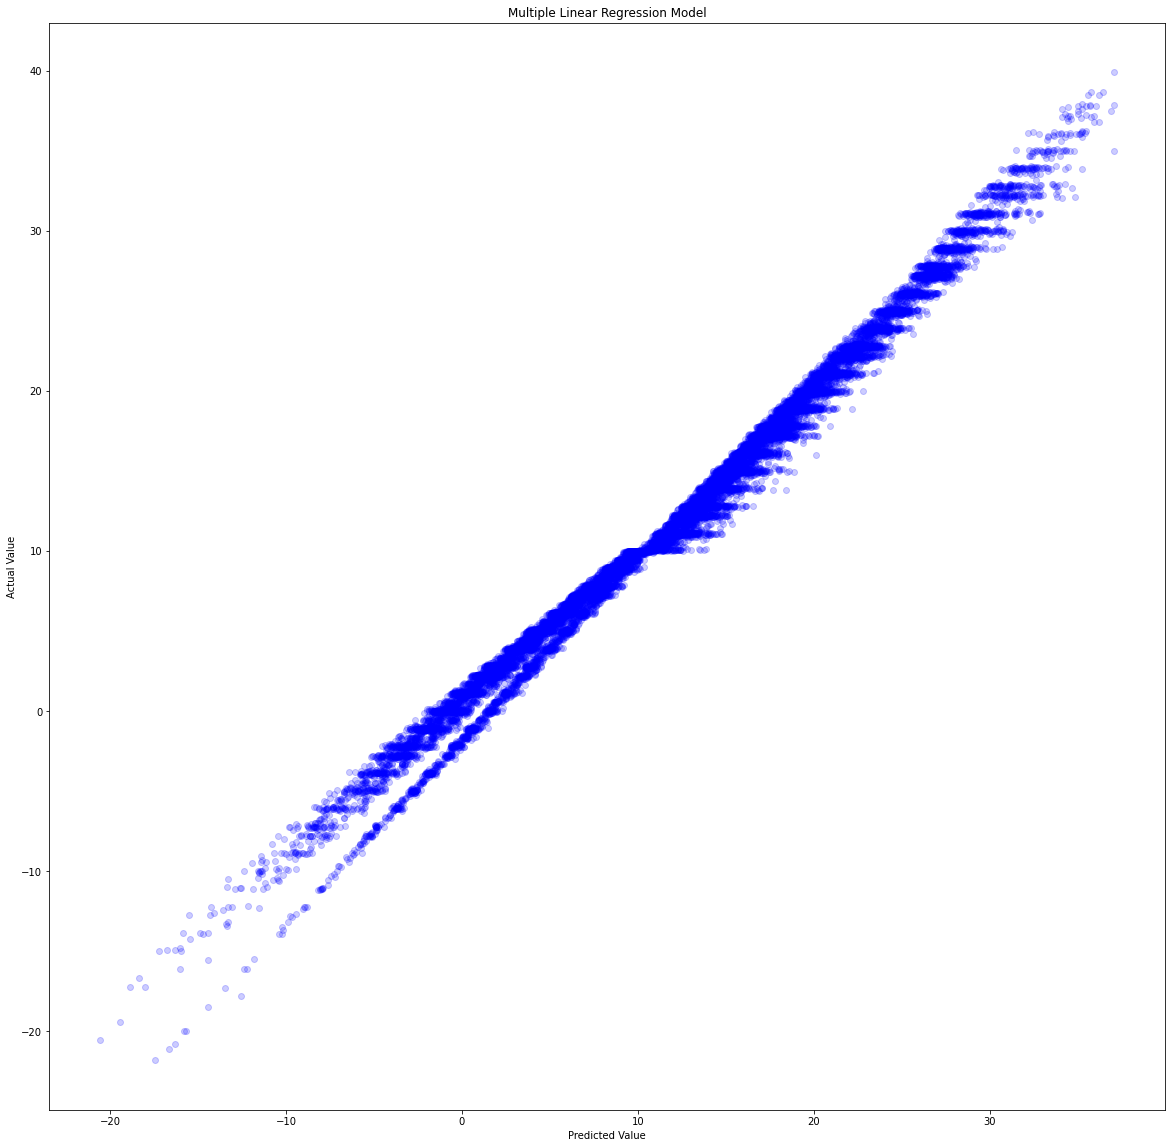

In [31]:
plt.figure(figsize=(20,20))
plt.scatter(Y_pred, Y_test, alpha=.2, color='blue',)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Multiple Linear Regression Model')
plt.show()